Project Name: 
Lending Case Study

Project Description: 

Primary goal of this project is to identify the factors responsible for loan defaults with the help of datasets provided. This will enable the company to refine loan approval processes by implementing stricter criteria for high-risk applicants, potentially leading to loan denials or adjustments and improve risk assessment models by developoing more accurate predictive models to better assess the creditworthiness of applicants.


Method used:

1. Data Exploration and Cleaning: 
    1.1 - Check the missing values
    1.2 - Handle missing values through imputation or data removal
    1.3 - Check for data types and convert if required

2. Exploratory Data Analysis
    2.1 - Target Variable Analysis
    2.2 - Univariate Analysis to check the distributions of numerical and categorical variables.
    2.3 - Bivariate Analysis to establish the relationship between relevant variables and the target variable.
    2.4 - Correlation Analysis to calculate and visualizes the correlation matrix for selected numerical variables.

3. Data Visualization: Utilizes different plots to visualize data distributions and relationships.

4. Data insight and conclusion:

    4.1 - Based on the Exploratory Data Analysis, analyze the variables which are strongly associated with loan defalt
    4.2 - Is there any significant differneces between defaulters and non-defaulters
    4.3 - Key risk factors that company should consider


Important features which indicate borrower's financial health, credit history and loan term. Below are the relevant columns from the dataset: 

1. Loan Terms and Amounts:

1.1 - loan_amnt: The original loan amount. Higher loan amounts might correlate with higher default risk.
1.2 - funded_amnt: The actual amount funded. Similar to loan_amnt, this is a key factor.
1.3 - term: The loan term (36 or 60 months). Longer terms might have higher default rates.
1.4 - int_rate: The interest rate. Higher interest rates often reflect higher risk borrowers.
1.5 - installment: The monthly payment amount. A high installment relative to income can be a risk factor.

2. Borrower's Financial Health and Income:

2.1 - annual_inc: Annual income. Lower income is generally associated with higher default risk.
2.2 - annual_inc_joint: Joint annual income (for joint applications). Important to consider for joint loans.
2.3 - dti: Debt-to-income ratio. A higher DTI indicates a higher debt burden and increased risk of default.
2.4 - dti_joint: Joint debt-to-income ratio.
2.5 - emp_length: Employment length. Shorter employment history can be a risk factor.
2.6 - home_ownership: Homeownership status. Homeowners are sometimes considered less risky than renters.

3. Credit History and Behavior:

3.1 - fico_range_high / fico_range_low: FICO score range. Lower FICO scores are strong indicators of higher default risk.
3.2 - delinq_2yrs: Number of delinquencies in the past 2 years. A history of delinquencies is a major red flag.
3.3 - mths_since_last_delinq: Months since the last delinquency. More recent delinquencies are more concerning.
3.4 - pub_rec: Number of public records (e.g., bankruptcies). Public records negatively impact creditworthiness.
3.5 - pub_rec_bankruptcies: Number of bankruptcies. A very strong indicator of risk.
3.6 - inq_last_6mths / inq_last_12m: Number of inquiries in the last 6/12 months. Many recent inquiries can suggest financial instability.
3.7 - open_acc: Number of open credit lines. A very high number could indicate overextension.
3.8 - revol_util: Revolving line utilization. High utilization (using a large percentage of available credit) is a risk factor.
3.9 - acc_now_delinq: Number of currently delinquent accounts.
3.10 - chargeoff_within_12_mths: Number of charge-offs in the last 12 months. Charge-offs are a serious indicator of past defaults.
3.11 - collections_12_mths_ex_med: Number of collections in the last 12 months (excluding medical). Another sign of financial distress.
3.12 - num_accts_ever_120_pd: Number of accounts ever 120+ days past due.
3.13 - num_tl_90g_dpd_24m: Number of accounts 90+ days past due in the last 24 months.
3.14 - pct_tl_nvr_dlq: Percentage of trades never delinquent. The inverse of this (100 - pct_tl_nvr_dlq) is also useful.

4. Credit Utilization and Balances:

4.1 - all_util: Balance to credit limit on all trades.
4.2 - bc_util: Bankcard utilization.
4.3 - il_util: Installment account utilization.
4.4 - avg_cur_bal: Average current balance.
4.5 - max_bal_bc: Maximum balance on revolving accounts.
4.6 - revol_bal: Total revolving balance.
4.7 - tot_cur_bal: Total current balance across all accounts.
4.8 - total_bal_ex_mort: Total balance excluding mortgage.

5. Loan Status (Target Variable):

5.1 - loan_status: This is your target variable. You'll use this to train your model to predict default. You'll need to convert this to a binary variable (e.g., 1 for default, 0 for not default). Common values that indicate default are "Charged Off," "Default," and potentially "Late (31-120 days)."

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
# Load the dataset
df = pd.read_csv('C:/Jagdish/IIIT Main Folder/IIIT Folder for my notes/Lending Case study/loan/loan.csv', low_memory=False) 

In [111]:
#print(df.head(10))

In [167]:
# 1. Data Exploration and Cleaning

# 1.1 Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                            0
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12942
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                    

In [113]:
#Change the view of the output, required when all the rows and columns are not visible in the output

pd.set_option('display.max_rows', None) 

# Set to display all columns
pd.set_option('display.max_columns', None)

# Set to display full column width
pd.set_option('display.max_colwidth', None)

# Show dimensions
pd.set_option('display.show_dimensions', True)

# Expand frame repr
pd.set_option('display.expand_frame_repr', True)

In [114]:
# Data Cleaning:

# 1.2 
# Handle missing values
# Filling missing values with median
# Data Type should be converted to numerical. 

def clean_emp_length(emp_length):
    if pd.isna(emp_length):
        return np.nan  # Keep as NaN for imputation or create a category
    elif emp_length == 'n/a':
        return np.nan
    elif emp_length == '10+ years':
        return 10
    elif emp_length == '< 1 year':
        return 0
    else:
        return int(emp_length.split()[0])

df['emp_length'] = df['emp_length'].apply(clean_emp_length)
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].median())



In [115]:
#Data Cleaning:
# A missing value in this column often means the borrower has never been delinquent.
# Replace missing values with 999 to indicate "never delinquent"

df['mths_since_last_delinq'] = df['mths_since_last_delinq'].fillna(999)


In [116]:
#Data Cleaning:

#Data Type should be numerical. Convert from percentage/string to float
# Handle missing values with mean

def clean_revol_util(util):
    if pd.isna(util):
        return np.nan
    else:
        return float(util.strip('%')) / 100

df['revol_util'] = df['revol_util'].apply(clean_revol_util)
df['revol_util'] = df['revol_util'].fillna(df['revol_util'].mean())
print(df)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [117]:
#collections_12_mths_ex_med
#Description: Number of collections in the last 12 months (excluding medical).
##Importance: Indicates recent financial difficulties.
# Data Cleaning: Handle missing values with 0, assuming no collections if not reported

# chargeoff_within_12_mths (Charge-offs in 12 Months):
#Description: Number of charge-offs in the last 12 months.
#Importance: A strong indicator of past defaults
#Data Cleaning: Handle missing values with 0

#pub_rec_bankruptcies:
#Description: Number of public record bankruptcies.
#Importance: A very strong indicator of financial distress and higher default risk.
#Data Cleaning: Handle missing values with 0


df['collections_12_mths_ex_med'] = df['collections_12_mths_ex_med'].fillna(0)
df['chargeoff_within_12_mths'] = df['chargeoff_within_12_mths'].fillna(0)
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(0)


In [ ]:
# 2. Handle Missing Values in DTI
#####df['dti'].fillna(df['dti'].median(), inplace=True)

# Calculate the median of the 'dti' column
dti_median = df['dti'].median()
df['dti'].fillna(dti_median)


In [ ]:
#Handle NaN value of Loan_status_numeric

#How: Filling NaN values with a new numerical value that doesn't conflict with our existing categories

df['loan_status_numeric'] = df['loan_status_numeric'].fillna(-1)

#print(df['loan_status_numeric'])

In [118]:
#pub_rec_bankruptcies:
#Data Cleaning: Handle missing values with median

df['annual_inc'].fillna(df['annual_inc'].median(), inplace=True) 


C:\Users\jagdi\AppData\Local\Temp\ipykernel_17868\3655015478.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['annual_inc'].fillna(df['annual_inc'].median(), inplace=True)


In [168]:
# 1.3 Check for data types
print("\nData types:\n", df.dtypes)



Data types:
 id                                         int64
member_id                                  int64
loan_amnt                                  int64
funded_amnt                                int64
funded_amnt_inv                          float64
term                                      object
int_rate                                 float64
installment                              float64
grade                                     object
sub_grade                                 object
emp_title                                 object
emp_length                               float64
home_ownership                            object
annual_inc                               float64
verification_status                       object
issue_d                           datetime64[ns]
loan_status                               object
pymnt_plan                                object
url                                       object
desc                                      object
purpos

In [ ]:
#convert int_rate from percentage to float for analysis

def Convert_int_rate_to_float(int_rate):
    if pd.isna(int_rate):
        return np.nan
    else:
        return float(int_rate.strip('%')) / 100

df['int_rate'] = df['int_rate'].apply(Convert_int_rate_to_float)

In [121]:
# 2. Exploratory Data Analysis (EDA)

# 2.1 Target Variable Analysis
print("\nLoan Status Distribution:")
print(df['loan_status'].value_counts(normalize=True))



Loan Status Distribution:
loan_status
Fully Paid     0.829620
Charged Off    0.141677
Current        0.028703
Name: proportion, Length: 3, dtype: float64


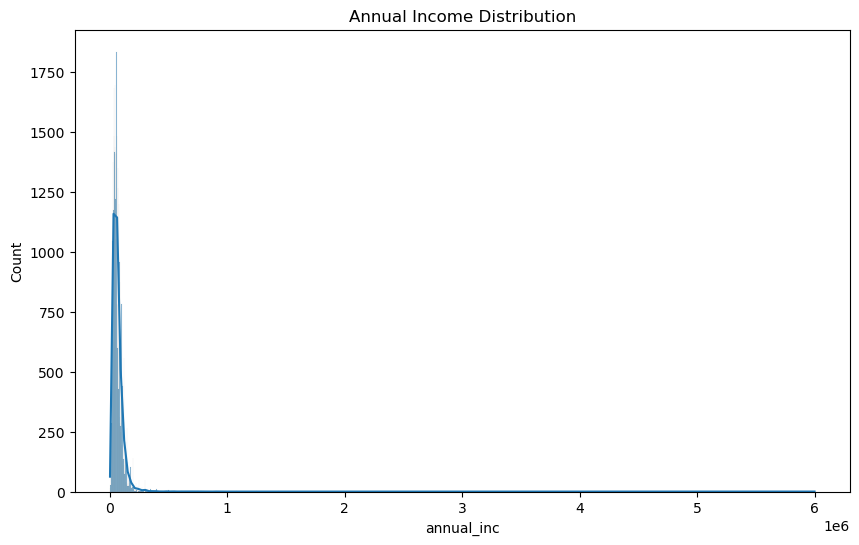

In [124]:
# 2.2 Univariate Analysis
# 2.2.1 Numerical Variables
plt.figure(figsize=(10, 6))
sns.histplot(df['annual_inc'], kde=True)
plt.title("Annual Income Distribution")
plt.show()

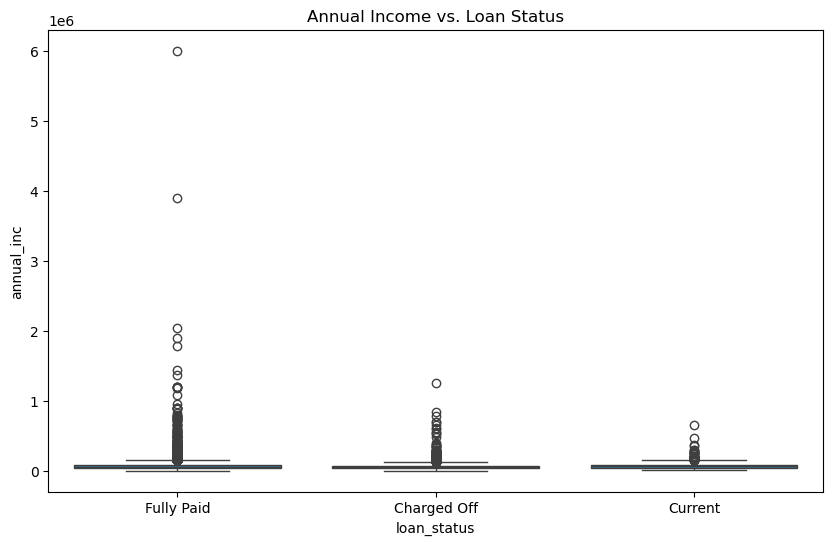

In [125]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='annual_inc', data=df)
plt.title("Annual Income vs. Loan Status")
plt.show()

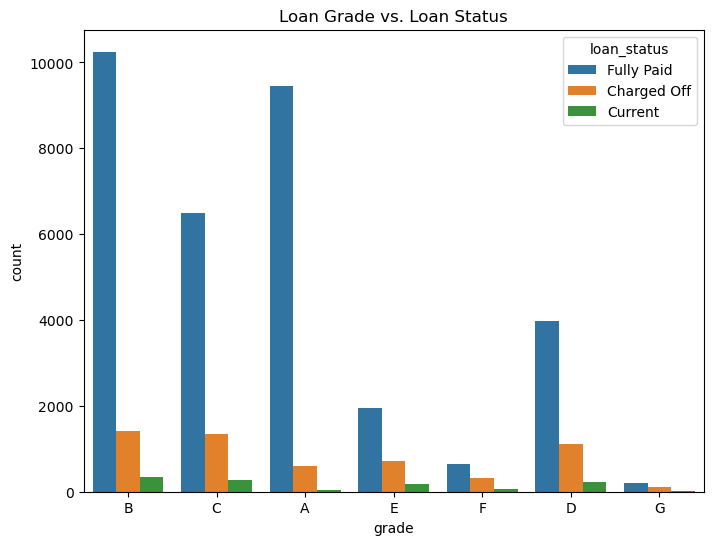

In [126]:
# 2.2.2 Categorical Variables
plt.figure(figsize=(8, 6))
sns.countplot(x='grade', hue='loan_status', data=df)
plt.title("Loan Grade vs. Loan Status")
plt.show()

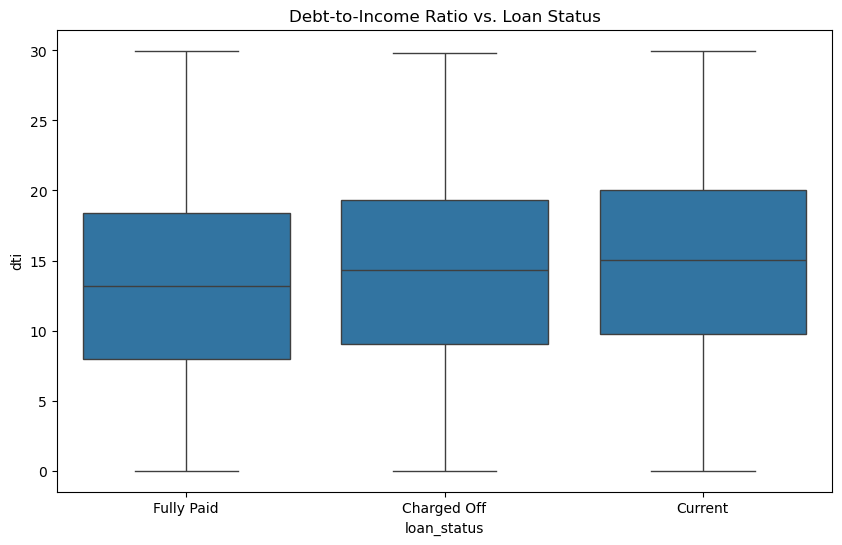

In [61]:
# 2.3 Bivariate Analysis
# 2.3.1 Numerical vs. Categorical
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='dti', data=df)
plt.title("Debt-to-Income Ratio vs. Loan Status")
plt.show()

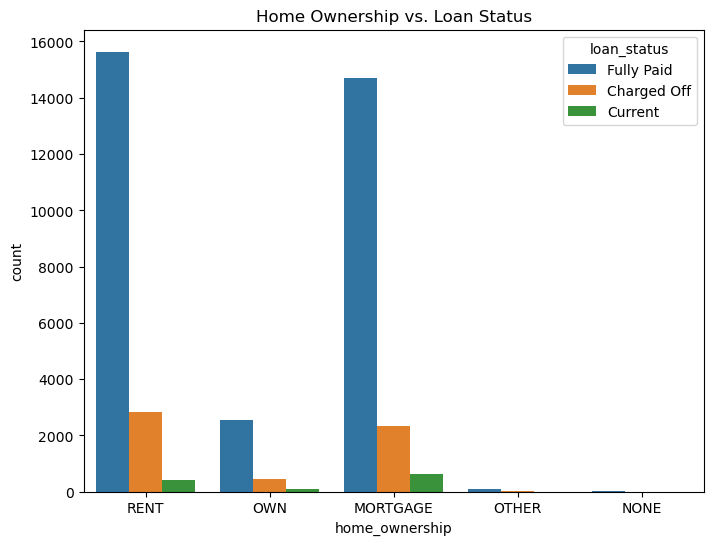

In [127]:
# 2.3.2 Categorical vs. Categorical
plt.figure(figsize=(8, 6))
sns.countplot(x='home_ownership', hue='loan_status', data=df)
plt.title("Home Ownership vs. Loan Status")
plt.show()

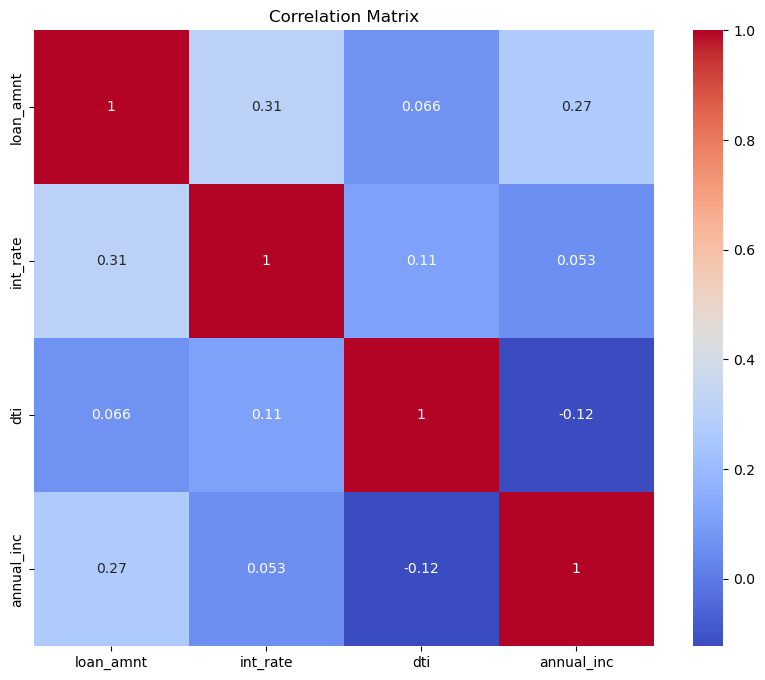

In [128]:
# 2.4 Correlation Analysis
correlation_matrix = df[['loan_amnt', 'int_rate', 'dti', 'annual_inc']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

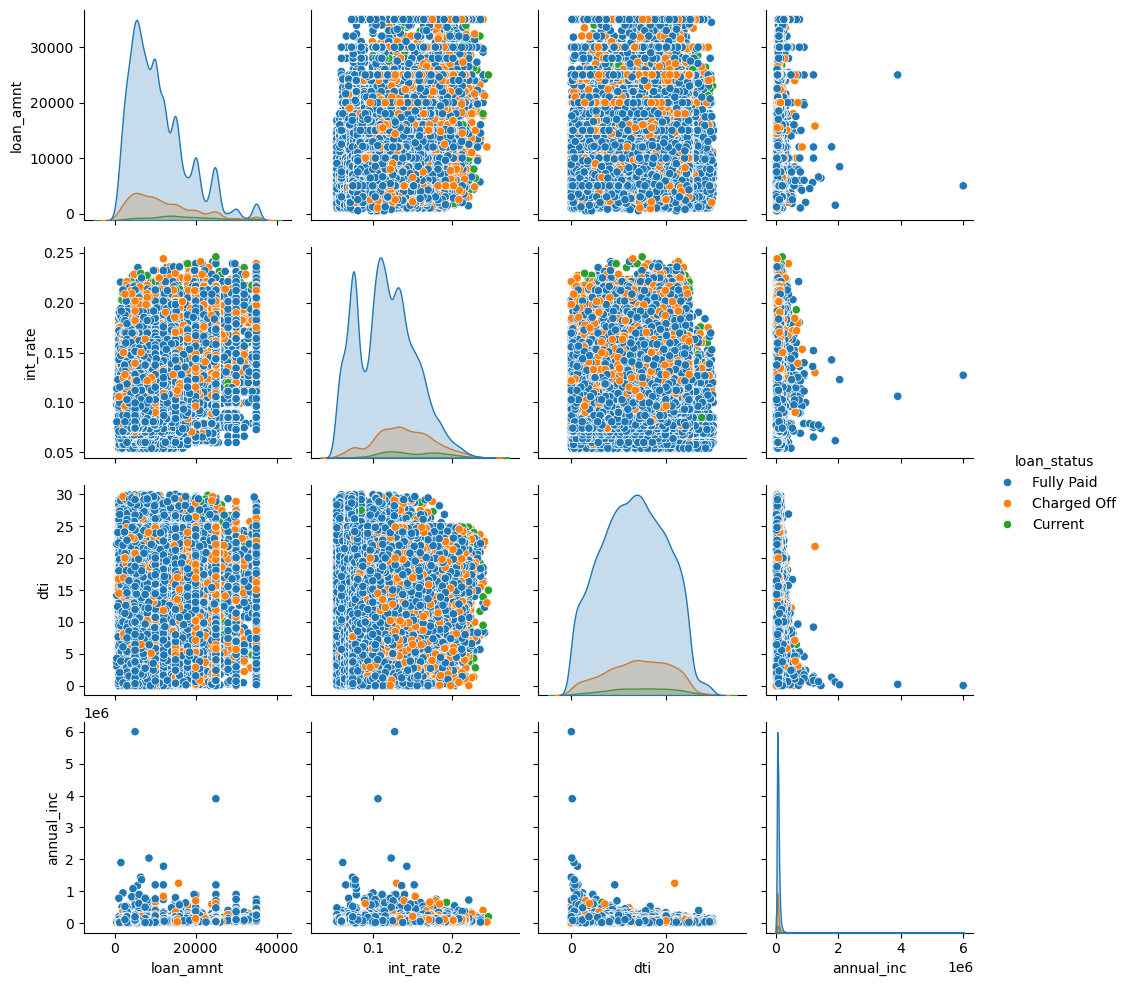

In [130]:
# 3. Data Visualization (Further Exploration)

# 3.1 Pairplot (for a subset of variables)
sns.pairplot(df[['loan_amnt', 'int_rate', 'dti', 'annual_inc',  'loan_status']], hue='loan_status')
plt.show()

In [160]:
# 4. Feature Engineering

# 4.1 Debt-to-Income Ratio

df['debt_to_income_ratio'] = df['dti'] 

count    39717.000000
mean        13.315130
std          6.678594
min          0.000000
25%          8.170000
50%         13.400000
75%         18.600000
max         29.990000
Name: dti, Length: 8, dtype: float64


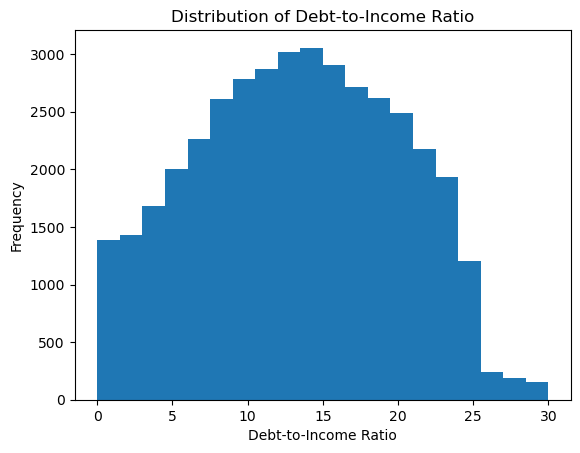

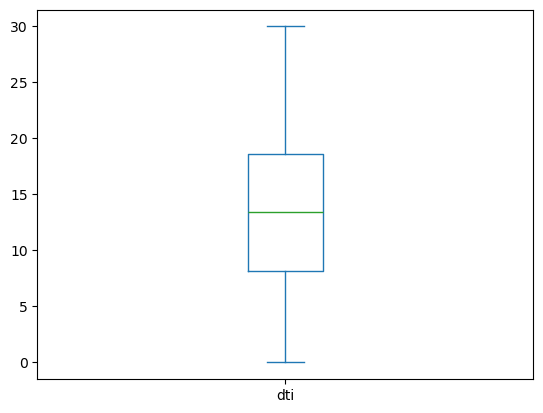

In [133]:
#Analyses with DTI:

# Examining the distribution of DTI using histograms and box plots. This helps understand the typical DTI values in our dataset and identify outliers.

#Summary Statistics: Calculating mean, median, standard deviation, quartiles, and range of DTI. This provides a concise summary of the data.

print(df['dti'].describe())
plt.hist(df['dti'], bins=20)
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Frequency')
plt.title('Distribution of Debt-to-Income Ratio')
plt.show()
df['dti'].plot(kind='box')
plt.show()

In [134]:
#Relationship with Loan Status (Default):
#Segmentation: Divide the DTI into categories (e.g., low, medium, high) and analyze the default rates within each category. 

df['dti_category'] = pd.qcut(df['dti'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4']) #Quartiles
print(df.groupby('dti_category')['loan_status'].value_counts(normalize=True))

dti_category  loan_status
Q1            Fully Paid     0.858409
              Charged Off    0.120544
              Current        0.021047
Q2            Fully Paid     0.836657
              Charged Off    0.134945
              Current        0.028399
Q3            Fully Paid     0.821719
              Charged Off    0.149723
              Current        0.028557
Q4            Fully Paid     0.801655
              Charged Off    0.161521
              Current        0.036824
Name: proportion, Length: 12, dtype: float64


C:\Users\jagdi\AppData\Local\Temp\ipykernel_17868\2893233002.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('dti_category')['loan_status'].value_counts(normalize=True))


In [136]:
#Correlation: Calculate the correlation between DTI and loan default. First converting loan_status to a numerical representation 
#A positive correlation indicates that higher DTI is associated with higher default rates.

def loan_status_numeric(loan_status):
    if pd.isna(loan_status):
        return np.nan
    elif loan_status == 'Charged Off':
        return 1
    elif loan_status == 'Fully Paid':
        return 2
    elif loan_status == 'Current':
        return 3

df['loan_status_Numeric'] = df['loan_status'].apply(loan_status_numeric)
#print(df['loan_status_Numeric'])

In [156]:
# Calculate Correlation

correlation = df['dti'].corr(df['loan_status_numeric'])

print(f"Correlation between DTI and Loan Default: {correlation}")

Correlation between DTI and Loan Default: -0.0417012636720239


1. Scatter Plot:

When to use: If you want to see the individual data points and the general trend of the relationship.
How: Plot DTI on the x-axis and the numerical representation of loan default (0 or 1) on the y-axis.
Interpretation:
A general upward trend (points going from bottom left to top right) indicates a positive correlation (higher DTI, higher likelihood of default).
A general downward trend indicates a negative correlation.   
If the points are scattered randomly with no clear trend, it suggests a weak or no correlation.

2. Box Plots (or Violin Plots):

When to use: If you want to compare the distribution of DTI for different loan statuses (default vs. not default).
How: Create two box plots side-by-side: one for the DTI values of defaulted loans and one for the DTI values of non-defaulted loans.
Interpretation:
If the box plot for defaulted loans is generally higher than the box plot for non-defaulted loans, it indicates a positive correlation.
The amount of overlap between the boxes gives you an idea of the strength of the relationship. Less overlap suggests a stronger correlation.
Violin plots are similar to box plots but also show the probability density of the data, which can provide additional insights into the distribution.   


3. Bar Chart (for Binned DTI):

When to use: If you want to show the default rate for different DTI ranges.
How: Divide the DTI into bins (categories) using pd.cut() or pd.qcut(). Then, create a bar chart where the x-axis represents the DTI bins and the y-axis represents the default rate (the proportion of defaults within each bin).


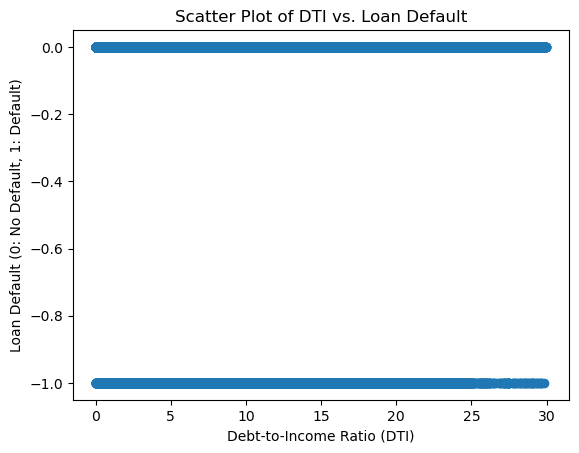

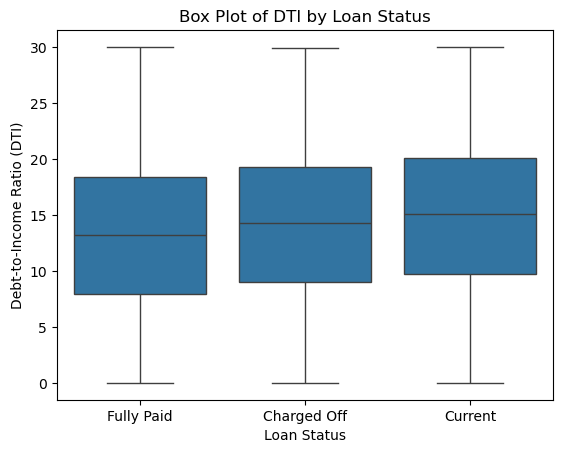

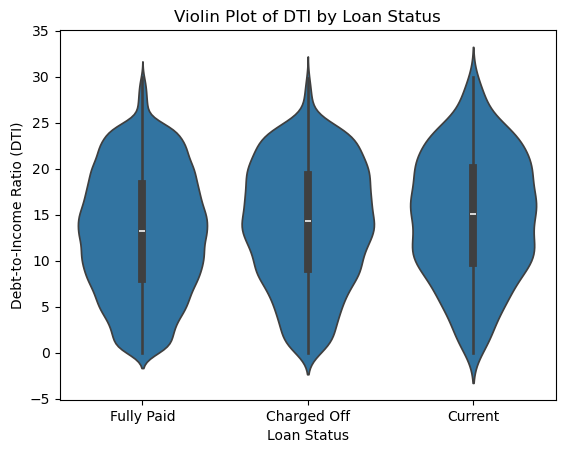

C:\Users\jagdi\AppData\Local\Temp\ipykernel_17868\1303755148.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rates = df.groupby('dti_bin')['loan_status_numeric'].mean() #calculating mean of the column. This will give the default rate as the column contains 0 and 1


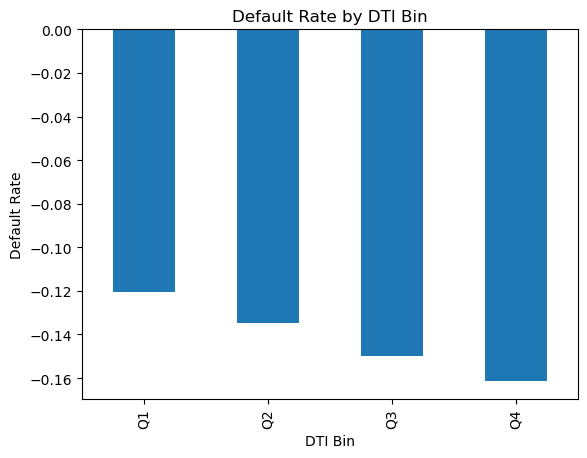

In [158]:
# 1. Scatter Plot:

plt.scatter(df['dti'], df['loan_status_numeric'])
plt.xlabel('Debt-to-Income Ratio (DTI)')
plt.ylabel('Loan Default (0: No Default, 1: Default)')
plt.title('Scatter Plot of DTI vs. Loan Default')
plt.show()

# 2. Box Plots (or Violin Plots):
sns.boxplot(x='loan_status', y='dti', data=df) #using original loan status column as it is more readable in the chart
plt.xlabel('Loan Status')
plt.ylabel('Debt-to-Income Ratio (DTI)')
plt.title('Box Plot of DTI by Loan Status')
plt.show()

sns.violinplot(x='loan_status', y='dti', data=df)
plt.xlabel('Loan Status')
plt.ylabel('Debt-to-Income Ratio (DTI)')
plt.title('Violin Plot of DTI by Loan Status')
plt.show()

#3. Bar Chart (for Binned DTI):

df['dti_bin'] = pd.qcut(df['dti'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])  # Example: quartiles
default_rates = df.groupby('dti_bin')['loan_status_numeric'].mean() #calculating mean of the column. This will give the default rate as the column contains 0 and 1
default_rates.plot(kind='bar')
plt.xlabel('DTI Bin')
plt.ylabel('Default Rate')
plt.title('Default Rate by DTI Bin')
plt.show()


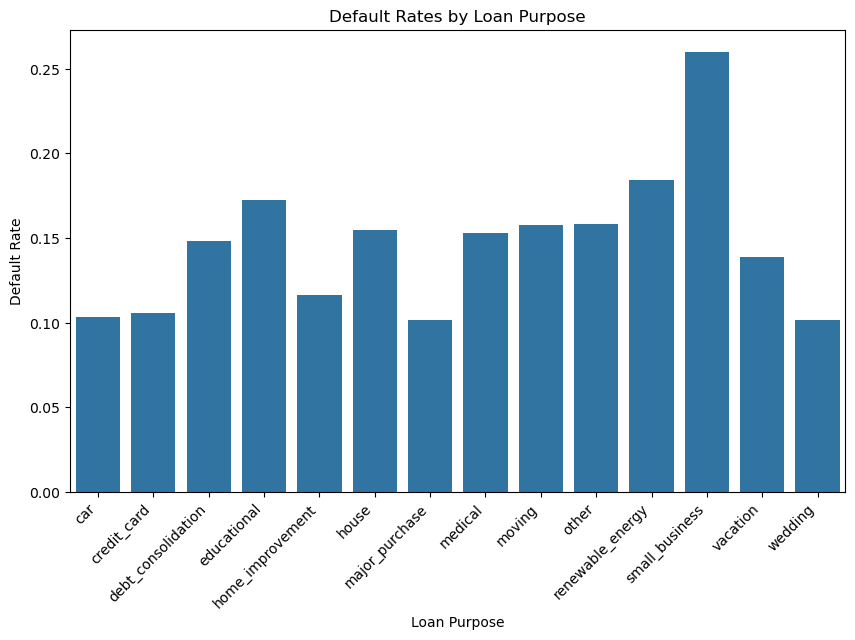

In [161]:
# Calculate default rates by purpose
default_rates = df.groupby('purpose')['loan_status'].apply(lambda x: (x == 'Charged Off').mean()).reset_index(name='default_rate')

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='purpose', y='default_rate', data=default_rates)
plt.title('Default Rates by Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Default Rate')
plt.xticks(rotation=45, ha='right')
plt.show()

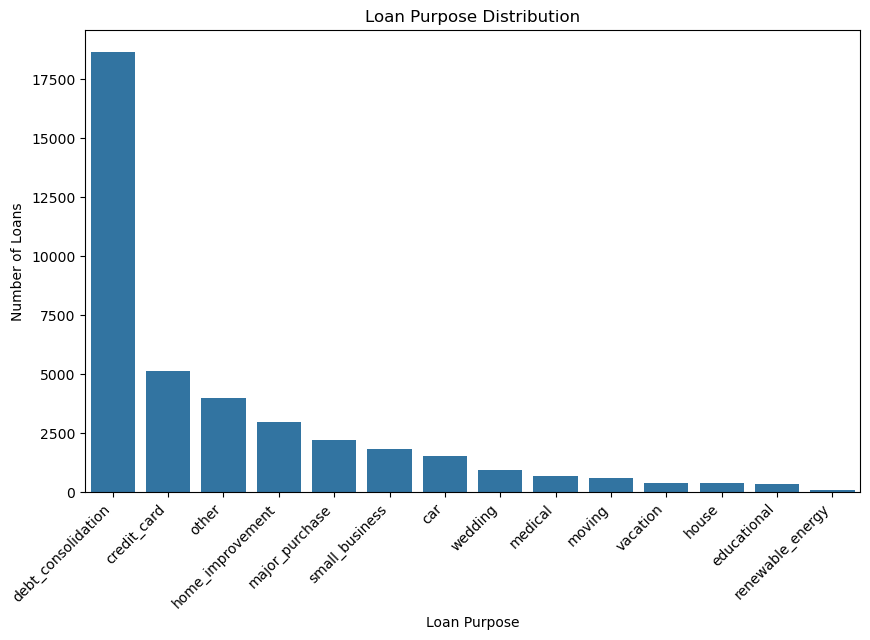

Loan Purpose Distribution:

purpose
debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: count, Length: 14, dtype: int64


In [162]:
#Loan Purpose Distribution

# Calculate the frequency distribution of loan purposes
purpose_counts = df['purpose'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=purpose_counts.index, y=purpose_counts.values)
plt.title('Loan Purpose Distribution')
plt.xlabel('Loan Purpose')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45, ha='right')
plt.show()

# Print the frequency distribution as a table
print("Loan Purpose Distribution:\n")
print(purpose_counts)

In [175]:
### need to check, getting error

# Convert 'issue_d' to datetime format
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y') 

# Group by month and find the top 4 products in each month
top_products_over_time = (
    df.groupby(pd.Grouper(key='issue_d', freq='M'))['purpose']
    .value_counts()
    .groupby('issue_d')
    .nlargest(4)
    .reset_index(name='count') 
)

# Create a line plot to visualize the trend of top 4 products over time
#plt.figure(figsize=(12, 6))
#sns.lineplot(x='issue_d', y='count', hue='purpose', data=top_products_over_time)
#plt.title('Top 4 Products Over Time')
#plt.xlabel('Issue Date')
#plt.ylabel('Number of Loans')
#plt.xticks(rotation=45)
#plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.show()

C:\Users\jagdi\AppData\Local\Temp\ipykernel_17868\4198620530.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.groupby(pd.Grouper(key='issue_d', freq='M'))['purpose']


ValueError: cannot insert issue_d, already exists

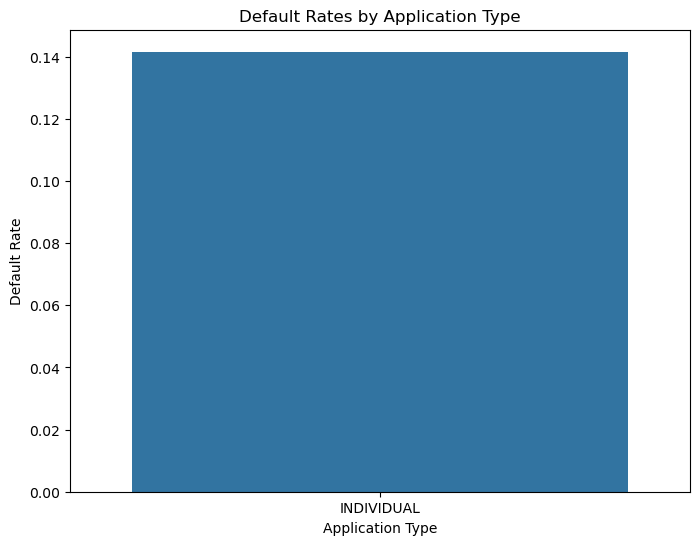

| application_type   |   loan_status |
|:-------------------|--------------:|
| INDIVIDUAL         |        14.17% |


In [177]:
# There is no join loan in the dataset


# Calculate the default rate for each application type
default_rates = df.groupby('application_type')['loan_status'].apply(
    lambda x: (x == 'Charged Off').mean()
)

# Create a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=default_rates.index, y=default_rates.values)
plt.xlabel('Application Type')
plt.ylabel('Default Rate')
plt.title('Default Rates by Application Type')
plt.show()

# Print the default rates table
print(default_rates.to_markdown(floatfmt=".2%"))